### Lab 5 12/03/2024
## Orla Fitzmaurice 20237154
### Regression and Dimensionality Reduction using pipelines

### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, TransformedTargetRegressor)
from sklearn.base import (BaseEstimator, TransformerMixin)
from sklearn.preprocessing import (StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### EDA

In [2]:
df = pd.read_csv("./insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,insurance_cost
0,18,male,33.770,1,no,southeast,1725.55230
1,18,male,34.100,0,no,southeast,1137.01100
2,18,female,26.315,0,no,northeast,2198.18985
3,18,female,38.665,2,no,northeast,3393.35635
4,18,female,35.625,0,no,northeast,2211.13075


In [3]:
df.tail()

,age,gender,bmi,children,smoker,region,insurance_cost
1333,64,female,31.825,2,no,northeast,16069.08475
1334,64,female,26.885,0,yes,northwest,29330.98315
1335,64,male,26.410,0,no,northeast,14394.55790
1336,64,male,36.960,2,yes,southeast,49577.66240
1337,64,male,23.760,0,yes,southeast,26926.51440


In [4]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [5]:
df.isna().sum()

age               0
gender            0
bmi               0
children          0
smoker            0
region            0
insurance_cost    0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,insurance_cost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


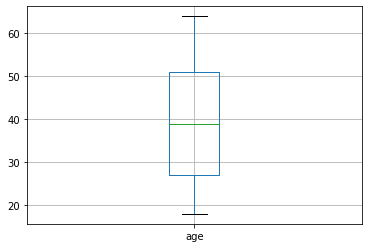

In [7]:
df.boxplot(column=['age'])
plt.show()
## no outliers
#looks normally dist

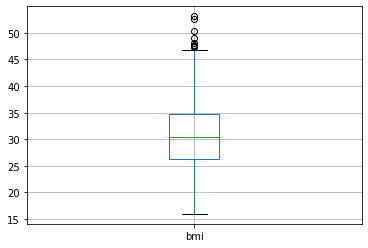

In [8]:
df.boxplot(column=['bmi'])
plt.show()

#several outliers on the higher values of bmi
# will have to use robust scaler

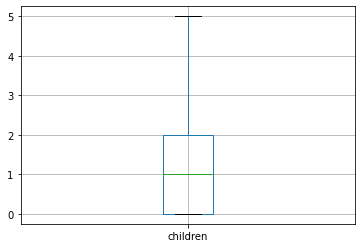

In [9]:
df.boxplot(column=['children'])
plt.show()
# maybe should be dummy encoded as a categorical variable 
#max children is 5

In [10]:
df['children'].value_counts()
#code onto catgeories

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

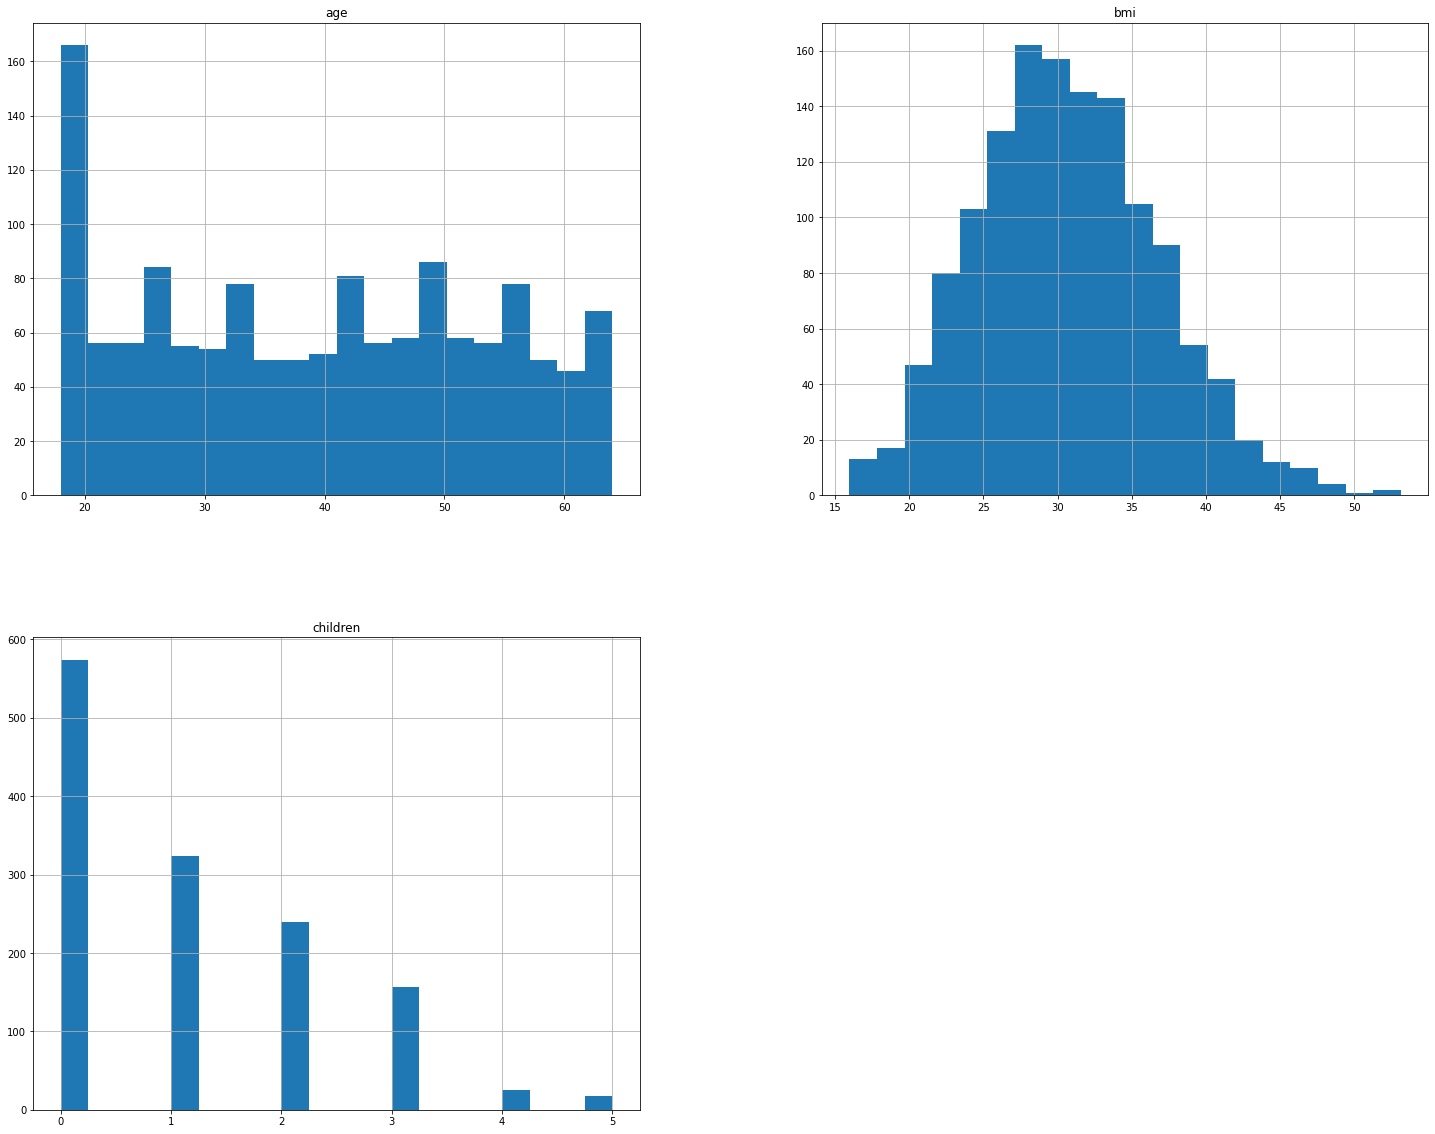

In [11]:
df.drop('insurance_cost', axis=1).hist(bins=20, figsize=(25, 20));

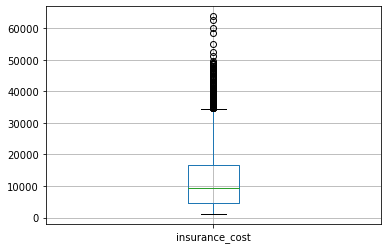

In [12]:
df.boxplot(column=['insurance_cost'])
plt.show()
#has several extreme outliers

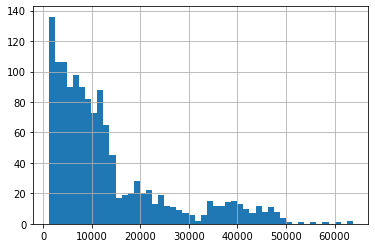

In [13]:
df['insurance_cost'].hist(bins=50)
plt.show()

### Eda Summary:
- Insurance dataset
- 1338 observations
- 6 predictors
- 1 continuos numerical response, cost of insurance
- mixture of numerical and categorical data
- region has 4 values
- no NA values in the dataset
- age has no outliers, bmi does have a few
- children could be dummy encoded to a categorical value
- age and bmi dont include 0 values, which wouldnt make sense
- bmi is normal
- ahe histogram looks really wierd
- insurance is very skewed

### Data Preparation

In [14]:
y = df['insurance_cost']
X = df.drop('insurance_cost', axis=1)

Making a pipeline to scale the data, and dummy encode children

In [20]:
transform_outliers = Pipeline(
    steps = [
        ("log_transform", FunctionTransformer(np.log)), 
        ("scaler", RobustScaler())
    ]
)



preprocess_pipeline = ColumnTransformer(
    transformers = [
        ("outliers_not_normal", transform_outliers, ['age',"insurance_cost"]),    
        ("no_outliers_normal", FunctionTransformer(np.cbrt), ["bmi"]),
        ("categorical", OneHotEncoder(drop='first',  sparse_output=False), ['gender','region',"smoker","children"])

    ],
    remainder="passthrough" # note there are no remaining columns in this example
)

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [19]:
preprocess_pipeline = ColumnTransformer(
    transformers = [
        ("no_outliers", StandardScaler(), ['age']),
        ("outliers", RobustScaler(), ['bmi',"insurance_cost"]),
        ("categorical", OneHotEncoder(drop='first',  sparse_output=False), ['gender','region',"smoker"])
    ],
    remainder="passthrough"
)
.set_output(transform="pandas") 

TypeError: __init__() got an unexpected keyword argument 'sparse_output'